<a href="https://colab.research.google.com/github/jsdysw/approaching_almost_any_mlp/blob/master/cross_validation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Hold out Cross-validation

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('winequality-red.csv')
quality_mapping = {
    3: 0,
    4: 1,
    5: 2,
    6: 3,
    7: 4,
    8: 5
}

df.loc[:,'quality'] = df['quality'].map(quality_mapping)

df = df.sample(frac=1).reset_index(drop=True)
df_train = df.head(1000)
df_test = df.tail(599)

In [4]:
from sklearn import tree
from sklearn import metrics

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
matplotlib.rc('xtick', labelsize=20)
matplotlib.rc('ytick', labelsize=20)

train_accuracies = [0.5]
test_accuracies = [0.5]

for depth in range(1,25):
  clf = tree.DecisionTreeClassifier(max_depth=depth)
  cols = ['fixed acidity',
        'volatile acidity',
        'citric acid',
        'residual sugar',
        'chlorides',
        'free sulfur dioxide',
        'total sulfur dioxide',
        'density',
        'pH',
        'sulphates',
        'alcohol']
  clf.fit(df_train[cols], df_train['quality'])

  train_predictions = clf.predict(df_train[cols])
  test_predictions = clf.predict(df_test[cols])

  train_accuracy = metrics.accuracy_score(
      df_train['quality'], train_predictions
  )
  test_accuracy = metrics.accuracy_score(
      df_test['quality'], test_predictions
  )

  train_accuracies.append(train_accuracy)
  test_accuracies.append(test_accuracy)


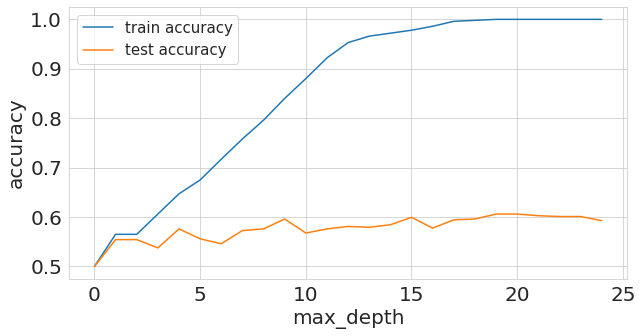

In [7]:
plt.figure(figsize=(10,5))
sns.set_style('whitegrid')
plt.plot(train_accuracies, label='train accuracy')
plt.plot(test_accuracies, label='test accuracy')
plt.legend(loc='upper left', prop={'size':15})
plt.xticks(range(0,26,5))
plt.xlabel('max_depth', size=20)
plt.ylabel('accuracy', size=20)
plt.show()

# K fold Cross-validation

In [4]:
import pandas as pd
from sklearn import model_selection

df = pd.read_csv('winequality-red.csv')
df['kfold'] = -1
df = df.sample(frac=1).reset_index(drop=True)

kf = model_selection.KFold(n_splits=5)

for fold, (trn_, val_) in enumerate(kf.split(X=df)):
  df.loc[val_, 'kfold'] = fold

# df.to_csv('winequality-red.csv', index = False)

# stratified k-fold

Text(0, 0.5, 'count')

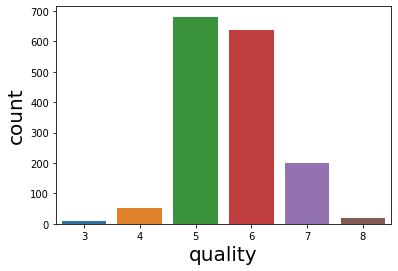

In [1]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn import model_selection
import seaborn as sns

df = pd.read_csv('winequality-red.csv')
b = sns.countplot(x='quality', data=df)
b.set_xlabel('quality', fontsize=20)
b.set_ylabel('count', fontsize=20)

In [20]:
def create_folds(data):
  data['kfold'] = -1

  data = data.sample(frac=1).reset_index(drop=True)
  num_bins = int(np.floor(1 + np.log2(len(data))))

  data.loc[:, 'bins'] = pd.cut(
      data['target'], bins=num_bins, labels=False
  )

  kf = model_selection.StratifiedKFold(n_splits=5)

  for f, (trn_, val_) in enumerate(kf.split(X=data, y=data['bins'])):
    data.loc[val_, 'kfold'] = f

  data = data.drop('bins', axis=1)
  return data

if __name__ == '__main__':
  # Generate a random regression problem.
  X, y = datasets.make_regression(
      n_samples=100, n_features=5, n_targets=1
  )

  print('n_samples, n_feats : ', X.shape)

  df = pd.DataFrame(
      X,
      columns=[f"f_{i}" for i in range(X.shape[1])]
  )

  display(df.head(2))
  df.loc[:, 'target'] = y
  df= create_folds(df)
  display(df.head(20))


n_samples, n_feats :  (100, 5)


,f_0,f_1,f_2,f_3,f_4
0,0.241392,-0.639715,0.384214,-1.298733,-1.650471
1,-1.702343,-0.000250,-1.031470,-0.813067,1.231786


,f_0,f_1,f_2,f_3,f_4,target,kfold
0,-2.342645,1.180524,0.983408,-0.373896,-0.275843,58.009094,0
1,0.353257,-0.199680,0.060962,1.174738,-0.266855,59.897010,0
2,-1.512556,-0.559499,-1.057049,-0.627333,-1.105340,-212.625700,0
3,-0.927187,-1.938234,-0.139353,0.999162,-0.556571,-151.424269,0
4,0.157264,0.403367,0.135130,-0.380963,0.219335,26.227003,0
5,0.595617,0.153825,-0.171478,-0.072892,0.653508,63.633949,0
6,-2.305768,-0.515717,-0.306917,-1.020378,-0.961048,-226.348993,1
7,0.406778,1.517316,1.093255,-1.349459,-2.174679,-139.849098,0
8,1.098487,-0.669762,0.415002,0.355673,-0.746273,-88.744307,0
9,-0.591472,0.179512,1.104239,1.461931,0.804038,214.829210,0
